<a href="https://colab.research.google.com/github/won-hj/25-1_CV/blob/main/Lecture2/CV25_HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title **CV25_HW02**
# 기한 :  4월 13일 일요일 23:59


**#2-1**
===
Fig3.9(a) 영상에 대해 오른쪽과 같은 결과가
나오도록 여러가지 경우에 대해 실험하고, 결과
를 분석해보세요.


In [ ]:
#!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/ #https://github.com/kjcheoi-class/CV
!wget 'https://github.com/kjcheoi-class/CV/blob/main/Fig0309(a)(washed_out_aerial_image).tif'

--2025-04-08 10:00:45--  https://github.com/kjcheoi-class/CV/blob/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif’

Fig0309(a)(washed_o     [ <=>                ] 208.19K  --.-KB/s    in 0.005s  

2025-04-08 10:00:45 (37.5 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif’ saved [213186]



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

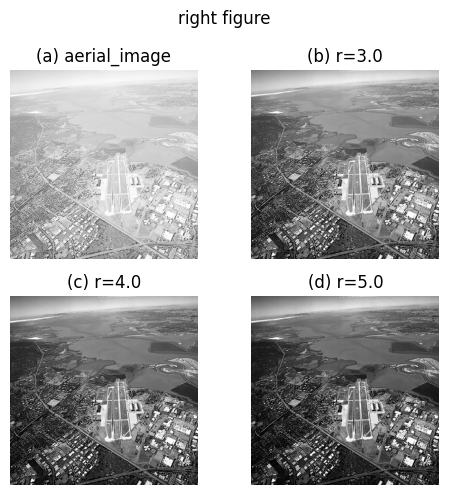

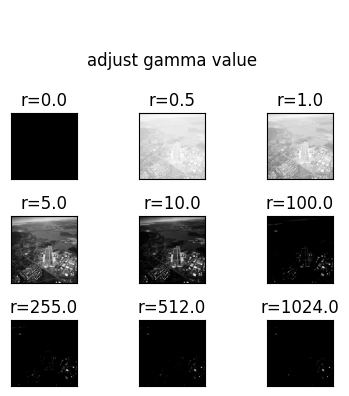

i: 0, j: 0, idx: 1, idx%3: 0
i: 0, j: 1, idx: 2, idx%3: 1
i: 0, j: 2, idx: 3, idx%3: 2
i: 1, j: 0, idx: 4, idx%3: 0
i: 1, j: 1, idx: 5, idx%3: 1
i: 1, j: 2, idx: 6, idx%3: 2
i: 2, j: 0, idx: 7, idx%3: 0
i: 2, j: 1, idx: 8, idx%3: 1
i: 2, j: 2, idx: 9, idx%3: 2


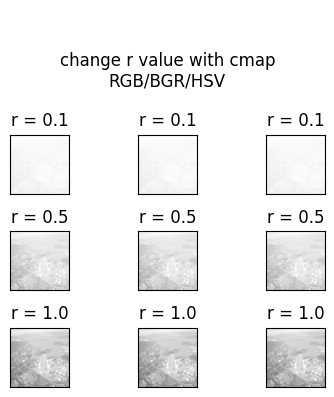

(None, None)

In [ ]:
# @title Power Low Transformation
#
# Fig3.9(a) 영상에 대해 오른쪽과같은결과가
# 나오도록여러가지경우에대해실험하고, 결과
# 를분석해보세요


# gamma 함수: 정규화 -> 감마값 제곱 -> 원래대로 복구
gamma = lambda f, r=1.0: np.uint8(((f/255.)**r)*255)

# (a). Aerial image
img = cv2.imread('/content/Fig0309(a)(washed_out_aerial_image).tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # c=1
img = cv2.resize(img, dsize=(0,0), fx=0.5, fy=0.5)

fig, ax = plt.subplots(2, 2, figsize=(5,5))
plt.suptitle('right figure')
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title(f'(a) aerial_image')

# (b)-(d); Results of applying the transportation in Eq.(3.2-3)

# (b). r= 3.0
img_b = gamma(f=img, r=3.0)
ax[0,1].imshow(img_b, cmap='gray')
ax[0,1].set_title(f'(b) r=3.0')

# (c). r= 4.0
img_c = gamma(f=img, r=4.0)
ax[1,0].imshow(img_c, cmap='gray')
ax[1,0].set_title(f'(c) r=4.0')

# (d). r= 5.0
img_d = gamma(img, 5.0)
ax[1,1].imshow(img_d, cmap='gray')
ax[1,1].set_title(f'(d) r=5.0')


for axis in ax.flat:
  axis.axis('off')
fig.tight_layout()
plt.show()

# 값 조정

# 감마 값 조정
r = np.array([0., 0.5, 1., 5., 10., 100., 255., 512., 1024.]) # 9개
stack = []
for i in range(len(r)):
    stack.append(gamma(img, r[i]))

plt.subplots(3,3, figsize=(4,4))
plt.suptitle('\n\nadjust gamma value')
for i in range(len(stack)):
  plt.subplot(3,3,i+1)
  plt.imshow(stack[i], cmap='gray')
  plt.xticks([]), plt.yticks([])
  plt.title(f'r={r[i]}')
plt.tight_layout(), plt.show()


# r, c 값 변경; rgb, gbr, hsv에 단순 적용
plt.subplots(3,3, figsize=(4,4))
plt.suptitle(f'\n\nchange r value with cmap\nRGB/BGR/HSV')

r = np.transpose([0.1, 0.5, 1.])
img_RGB = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img_BGR = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_HSV = cv2.cvtColor(img, cv2.COLORMAP_HSV)

cmap = [img_RGB, img_BGR, img_HSV]
channel = ['RGB', 'BGR', 'HSV']
for i in range(3):
  for j in range(3):
    idx = i*3 + j + 1
    plt.subplot(3,3,idx)
    img = cmap[(idx-1)%3]
    plt.imshow(gamma(img, r[i]))
    print(f'i: {i}, j: {j}, idx: {idx}, idx%3: {(idx-1)%3}')
    plt.title(f'r = {r[i]}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout(), plt.show()


# gc = np.hstack(stack)
# cv2_imshow(gc)
# gc=np.hstack((gamma(img,1.0), gamma(img,5.0), gamma(img,10.0), gamma(img, 100.), gamma(img, 255.),
#               gamma(img, 512.), gamma(img, 1024.)))
# gc=np.hstack(stack)

# cv2_imshow(gc)



In [ ]:
# @title 결과 분석
## 결과 분석
# r 값이 높아질수록 화면이 어두워짐
# 1 이하 값을 주면 화면이 밝아지지만 0.0값을 주면 아얘 검은 화면이 출력되고
# 일정 값 이상 주면 대부분 어두운 화면이 출력되지만 0.0과는 다르게 노이즈 느낌으로 출력되는 것이 있음

# 3차원 이미지를 가지고 단순 적용하여 조정해봤을 때, 육안으로는 r값에 따른 rgb, bgr, hsv의 차이가 없어 보임

**#2-2**
===
Fig3.10(a) 영상에 대해 오른쪽과 같은 결과
가 나오도록 여러가지 경우에 대해 실험하고,
결과를 분석해보세요.

In [ ]:
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/

--2025-04-08 12:39:26--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2025-04-08 12:39:26 ERROR 400: Bad Request.



In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

t1: (106, 35), t2: (160, 220)


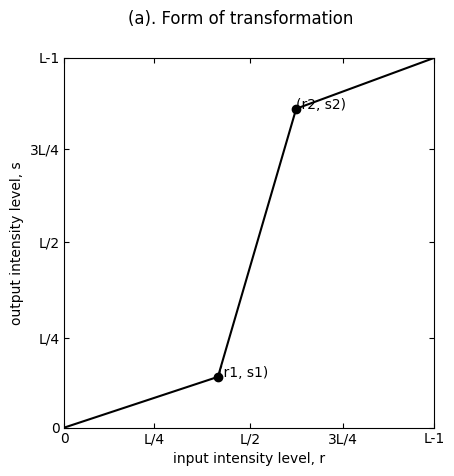

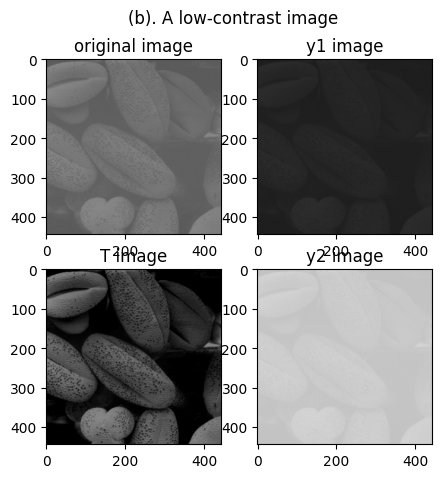

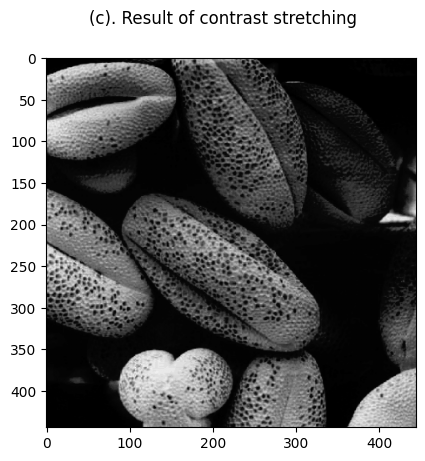

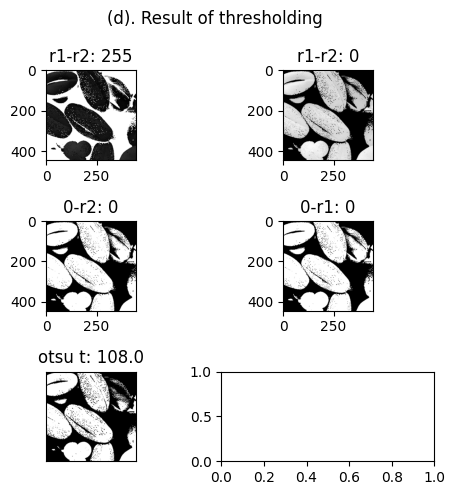

In [ ]:
# @title Piecewise-Linear Transformation
# Fig3.10(a) 영상에 대해 오른쪽과같은결과
# 가나오도록여러가지경우에대해실험하고,
# 결과를분석해보세요

# original pollen image
img = cv2.imread('/content/Fig0310(b)(washed_out_pollen_image).tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # c=1
img = cv2.resize(img, dsize=(0,0), fx=0.5, fy=0.5)
#cv2_imshow(img)

# (a). Form of transformation
### 입력 픽셀 값을 여러 구간으로 나누고, 각 구간에서 선형 함수를 적용하여 변환

# L -> 256, L/4=64, L/2=128, 3L/4=192, L-1=255
L = 256
level = [0, 62, 128, 192, 255]
l_label = ['0', 'L/4', 'L/2', '3L/4', 'L-1']
input_intensity_level = np.linspace(0, L-1)
output_intensity_level = np.linspace(0, L-1) # 적용 전


# y=w*x+b, w=dy/dx, b = y - w*x

#구간 정의; 적당히 그림 보면서 유추
r1, s1 = 106, 35
r2, s2 = 160, 220
t1, t2 = (r1,s1), (r2,s2)
O, corner = (0,0), (255,255)
print(f't1: {t1}, t2: {t2}')

## y1
grad_y1 = (t1[1]-O[1]) / (t1[0]-O[0])
b_y1 = t1[1] - grad_y1 * t1[0]
y1 = lambda x: grad_y1 * x + b_y1

## y2
grad_y2 = (corner[1] - t2[1]) / (corner[0] - t2[0])
b_y2 = t2[1] - grad_y2 * t2[0]
y2 = lambda x: grad_y2 * x + b_y2

#T 정의; w*x+b
#T = lambda x, w, b: w*x+b
grad_T = (t2[1] - t1[1]) / (t2[0] - t1[0])
b_T = t1[1] - grad_T * t1[0]
y_T = lambda x: grad_T * x + b_T


# 구간 표시
plt.axes().set_aspect('equal')

plt.plot(t1[0], t1[1],'ko', )
plt.text(t1[0], t1[1], f'(r1, s1)') #t1 ({t1[0]},{t1[1]})
plt.plot(t2[0], t2[1], 'ko')
plt.text(t2[0], t2[1], f'(r2, s2)') #t2 ({t2[0]},{t2[1]})
#plt.text(t1, f'({s1, r1}))') #output_intensity_level

x1 = np.linspace(0, t1[0]) # for y1
x2 = np.linspace(t2[0], L-1) # for y2
t = np.linspace(t1[0], t2[0]) # for T


plt.plot(x1, y1(x1), 'k-')
plt.plot(x2, y2(x2), 'k-')
plt.plot(t, y_T(t), 'k-')
# plt.text(t, y_T(t), "<- T(r)")


plt.xticks(level, labels=l_label)
plt.yticks(level, labels=l_label)
plt.xlabel('input intensity level, r')
plt.ylabel('output intensity level, s')
plt.xlim([0, 255])
plt.axis([0,255,0,255])
plt.tick_params('both', direction='in', top=True, right=True)
plt.suptitle('(a). Form of transformation')
plt.show()

# (b). A low-contrast image
#r1, s1 = 106, 50
#r2, s2 = 160, 220
fig, ax = plt.subplots(2,2,figsize=(5,5))

ax[0,0] = plt.subplot(2,2,1)
ax[0,0] = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0,0] = plt.title('original image')
#print(f'y1(s2): {y1(s2)}')

## 각각 y1, T, y2 만 적용

###### , vmin=0, vmax=255 없이 출력하면 이미지가 제대로 안나왔는데 gpt가 넣으래서 넣었더니 잘 나옴

img_y1 = y1(img)

ax[0,1] = plt.subplot(2,2,2)
ax[0,1] = plt.imshow(img_y1, cmap='gray', vmin=0, vmax=255)
ax[0,1] = plt.title('y1 image')

img_T = y_T(img)
ax[1,0] = plt.subplot(2,2,3)
#print(f'img_y1 no clip: {img_y1}')
ax[1,0] = plt.imshow(img_T, cmap='gray', vmin=0, vmax=255)
ax[1,0] = plt.title('T image')

img_y2 = y2(img)
ax[1,1] = plt.subplot(2,2,4)
ax[1,1] = plt.imshow(img_y2, cmap='gray', vmin=0, vmax=255)
ax[1,1] = plt.title('y2 image')

plt.suptitle('(b). A low-contrast image\n\n')
plt.show()

#print(f'ori: {img[:5,:5]}\ny1: {img_y1[:5,:5]}\nT: {img_T[:5,:5]}\ny2: {img_y2[:5,:5]}')

# hstack = np.hstack([img, img_y1, img_T, img_y2])
# cv2_imshow(hstack) #cv2_imshow 로 출력
##### plt로는 안나오더니 이건 나옴

#plt.xticks([]), plt.yticks([])
#plt.show()



# (c). Result of contrast stretching
# r:input, s:output
        # img[:s1]
        # img[s1:s2, r]


#원본 픽셀값을 가지고 변환
# 0~r1/ r1~r2/ r2~255
#마스킹
img_cs = img.copy()

mask1 = img_cs < r1
maskT = (img_cs >= r1) & (img_cs < r2)
mask2 = img_cs > r2

img_cs[mask1] = y1(img_cs[mask1])
img_cs[maskT] = y_T(img_cs[maskT])
img_cs[mask2] = y2(img_cs[mask2])

#img = y1(img) if img.any() < r1 else y_T(img) if img.any() < r2 else y2(img)
#img_cs = contrast_stretch(img)

plt.imshow(img_cs, cmap='gray')

plt.suptitle('(c). Result of contrast stretching')
plt.show()

# (d). Result of thresholding
# (r1,s1), (r2,s2) 기준 낮거나 높으면 0 중간 255 적용

img_T = img.copy()

fig, ax = plt.subplots(3,2 , figsize=(5,5))
fig.suptitle('(d). Result of thresholding')

### 흰 배경, 검은색 물체
mask_T = (img_T < r1) | (img_T > r2)
#print(mask_T)
img_T[mask_T] = 0
img_T[~maskT] = 255 # !은 괄호가 안닫힌다고 나옴

ax[0,0] = plt.subplot(3,2,1)
ax[0,0]=plt.imshow(img_T, cmap='gray')
ax[0,0] = plt.title(f'r1-r2: 255')

#plt.show()

### 검은 배경, 회색 물체
img_T[mask_T] = 255
img_T[~maskT] = 0

ax[0,1] = plt.subplot(3,2,2)
ax[0,1] = plt.imshow(img_T, cmap='gray')
ax[0,1] = plt.title(f'r1-r2: 0')
#plt.show()

# 0~r2: 0
mask_T = img_T < r2
img_T[mask_T] = 255
img_T[~maskT] = 0
ax[1,0] = plt.subplot(3,2,3)
ax[1,0]=plt.imshow(img_T, cmap='gray')
ax[1,0] = plt.title(f'0-r2: 0')
#plt.show()

# 0~r1: 0
mask_T = img_T < r1
img_T[mask_T] = 255
img_T[~maskT] = 0

ax[1,1] = plt.subplot(3,2,4)
ax[1,1]=plt.imshow(img_T, cmap='gray')
ax[1,1] = plt.title(f'0-r1: 0')
#plt.show()




#오츄 -> t: 108
otsu_t = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ax[2,0] = plt.subplot(3,2,5)
ax[2,0]=plt.imshow(otsu_t[1], cmap='gray')
ax[2,0] = plt.title(f'otsu t: {otsu_t[0]}')

plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()



##

In [ ]:
# @title 테스트
print(otsu_t)
#print(img.shape)
#print(img[5,5])
# # plt.imshow(img, cmap='gray'), plt.show()
# # #r1, s1 = 106, 50
# # #r2, s2 = 160, 220
# # img[0:s1,0:r1] = y1(img[0:s1, 0:r1])
# # plt.imshow(img, cmap='gray'),plt.show()
# # #img[s1:s2, r1:r2] = y_T(img[s1:r2, r1:r2])
# # img[s2:255, r2:255] = y2(img[s2:255, r2:255])
# # plt.imshow(img, cmap='gray')
# # #cv2_imshow(img)
# img_y1[:s1, :s1] = y1(img[:s1,:s1])
# plt.imshow(img, cmap='gray'), plt.show()
# plt.imshow(img_y1, cmap='gray'), plt.show()
# plt.imshow(img_T, cmap='gray'), plt.show()
# plt.imshow(img_y2, cmap='gray'), plt.show()


# # cv2_imshow(img)
# # cv2_imshow()

# hstack = np.hstack([img, img_y1, img_T, img_y2])
# cv2_imshow(hstack)

(108.0, array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8))


In [ ]:
# @title 결과 분석
# (a),그래프에 나오는 점은 임의로 잘 맞아보이는 좌표로 설정했으나, 생각보다 큰 차이는 없어보임
# (b) 완만한 기울기의 함수를 적용했을 땐 이미지가 단순히 밝거나 어두운 수준으로 보이며,
# 가파른 기울기를 가진 함수를 적용하니 좀 더 선명해보임
# 그러나 제시된 (b) 이미지는 low-contrast image라고 함에도,
# 완만한 기울기를 가지는 y1 함수를 적용한 이미지보단 plt로 출력된 원본 이미지와 더 비슷해 보임
# (c) 세 함수를 모두 적용하여 edge strength 결과를 보니 주어진 이미지와 완전히 같진 않지만 거의 같아 보임
# 조금 더 선명한 정도라고 생각함
# (d) 설정한 좌표값과 오츄 알고리즘으로 출력함
# 오츄가 조금 더 좌표보다 오른쪽 값을 가진 결과 더 원본 이미지를 잘 표현했다고 보임



**#2-3**
===
임의의 영상을 입력 받아 아래와 같은 마스크를 사용하여 컨볼루션 하고, 그 결과를 분석해보세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

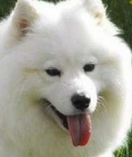

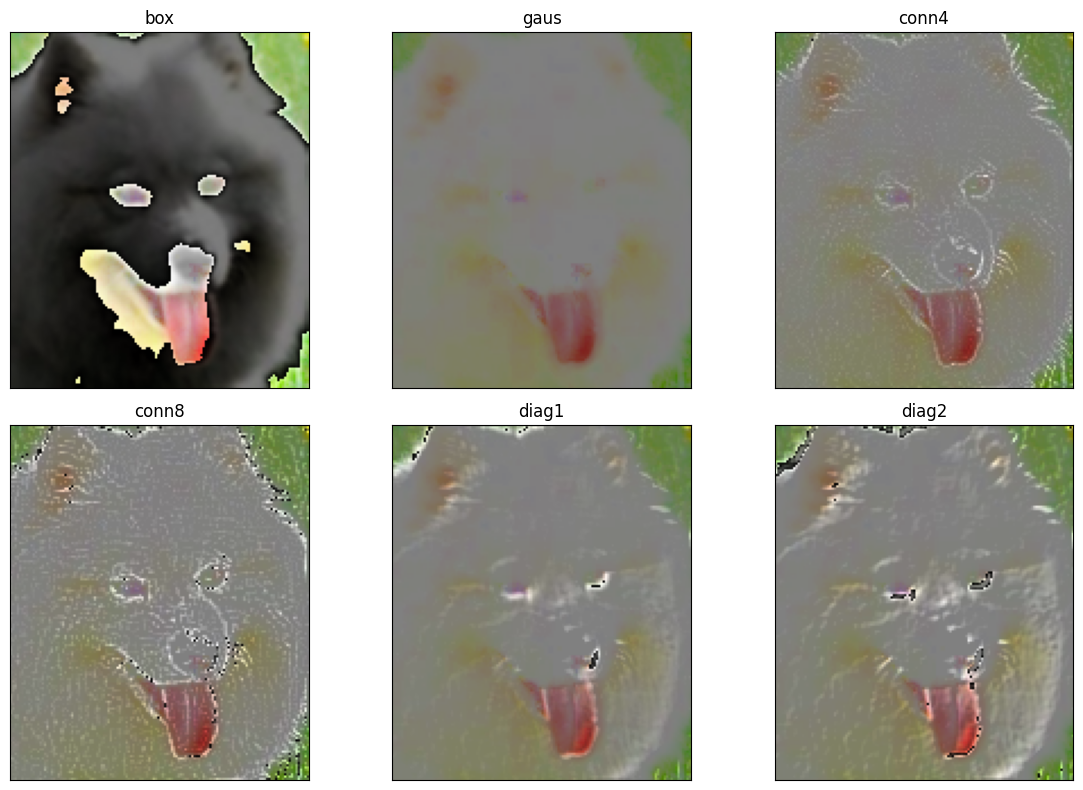

(157, 132)


In [ ]:
# @title First Derivative Operator
# 임의의 영상을 입력 받아 아래와 같은 마스크를 사용하여 컨볼루션 하고, 그 결과를 분석해보세요.

img = cv2.imread('dog1.png')
cv2_imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 색상 유지하고싶어서 v만 사용
h,s,v = cv2.split(img)
# #
# cv2_imshow(img)

# 마스크
mask1 = np.ones((3,3)) / 9 # 1/9 박스
mask2 = cv2.GaussianBlur(v, (5,5), 0.0) # 가우시안
mask3 = np.array([[0,  -1,  0],#4 conn
                  [ -1,  4,  -1],
                  [ 0,  -1,  0]])
mask4 = np.array([[-1, -1,  -1],#8 conn
                  [-1,  8,  -1],
                  [ -1,  -1,  -1]])
mask5 = np.array([[-1,0,0],# 대각선필터1
                  [0,0,0],
                  [0,0,1]])
mask6 = np.array([[-1,-1,0],# 2
                  [-1,0,1],
                  [0,1,1]])

box = cv2.filter2D(v, -1, mask1) # 박스 필터
gaus = cv2.filter2D(v, -1, mask2) # 가우시안
conn4 = cv2.filter2D(v, -1, mask3) # 4 커넥트
conn8 = cv2.filter2D(v, -1, mask4) # 8커넥트
diag1 = cv2.filter2D(v, -1, mask5) #대각선 1
diag2 = cv2.filter2D(v, -1, mask6) # 대각선 2

filtered = [box, gaus, conn4, conn8, diag1, diag2]
filtered_name = ['box', 'gaus', 'conn4', 'conn8', 'diag1', 'diag2']
#클리핑
clip = [np.uint8(np.clip(filtered[i]+128, 0, 255)) for i in range(len(filtered))]

#채널병합
merge = [cv2.merge([h,s,clip[i]]) for i in range(len(filtered))]

#brg 변환
rgb = [cv2.cvtColor(m, cv2.COLOR_HSV2RGB) for m in merge]


dogs = rgb
#출력
fig, ax = plt.subplots(2, 3, figsize=(12,8))
for i in range(len(filtered)):
  plt.subplot(2,3,i+1)
  plt.imshow(dogs[i], cmap='Pastel1')
  plt.xticks([]), plt.yticks([])
  plt.title(f'{filtered_name[i]}')

plt.tight_layout()
plt.show()
# hstack = np.hstack([mask1, mask2, mask3, mask4, mask5, mask6])
# cv2_imshow(hstack)
print(mask2.shape)


In [ ]:
# @title 결과 분석
# 색이 있는 이미지를 사용해보려고 hsv의 v채널에만 연산한 뒤 다시 채널을 합쳐 표현함
# 박스필터 사용 결과 강아지와 배경이 분리되었고, 눈과 코, 입 귓속은 포함되지 않음
# 가우시안 필터 사용 시 뿌옇게 되어 화질이 저하됨었지만 수염이나 잔털들 또한 사라짐
# 4연결성필터 사용 결과 배경과 강아지의 특징에 대한 외곽선이 강조되었으나, 오른쪽 귀쪽에 구멍이 생겼고 노이즈같은 부분이 남아 있음
# 8연결성필터 사용 결과 4보다 더 많이 특징이 표현된 것 같으며, 구멍도 그만큼 많이 생김
# 첫번째와 두번째 대각선 필터 결과를 보면 구멍이 생겼고, 눈을 감은 것처럼 왼쪽 상단에서 오른쪽 하단 방향으로 검출 되었고,
# 필터에 0이 아닌 숫자가 더 많아지는 만큼 강조되거나 영향이 더욱 커짐

**#2-4**
===
아래와 같은 영상에 대하여 45°, -45° 방향의 대각선 edge를 검출하되, Sobel 연산자를 변형하여 적절한 마스크를
만들어 적용해보세요.

In [ ]:
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg

--2025-04-11 07:07:54--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824868 (806K) [image/jpeg]
Saving to: ‘school.jpg’

school.jpg          100%[===================>] 805.54K  --.-KB/s    in 0.06s   

2025-04-11 07:07:54 (13.1 MB/s) - ‘school.jpg’ saved [824868/824868]



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


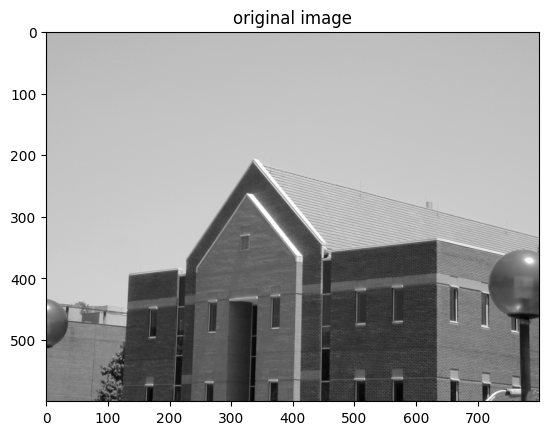

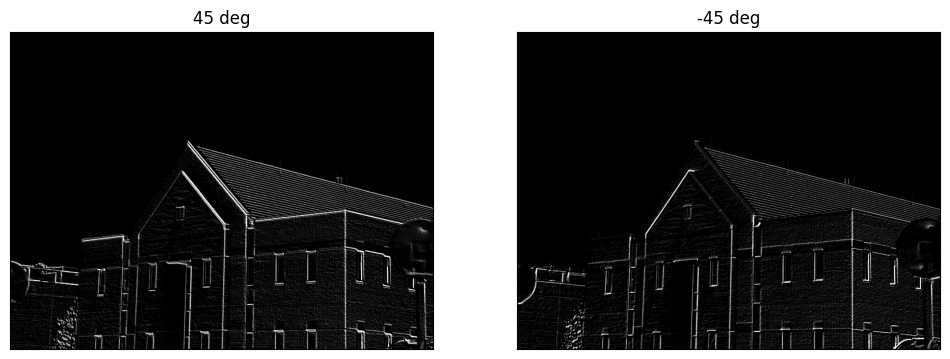

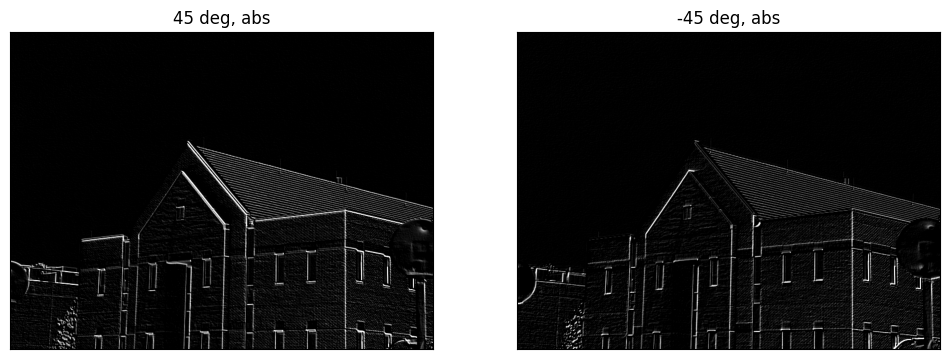

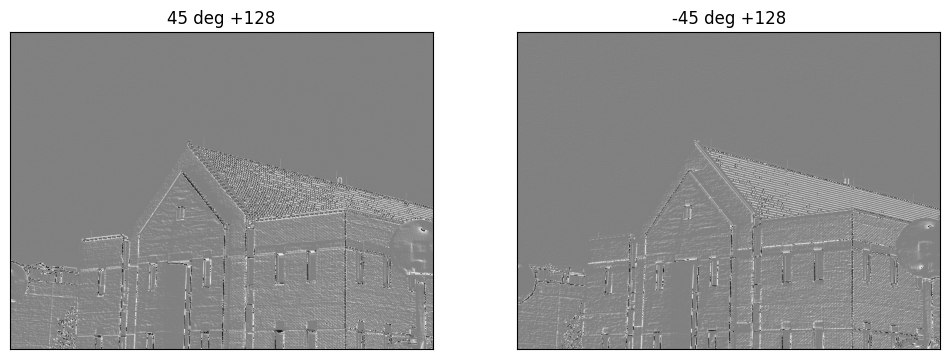

In [ ]:
# @title First Derivative Operator
# 아래와같은영상에대하여45°, -45°방향의대각선edge를검출하되, Sobel 연산자를변형하여적절한마스크를
# 만들어적용해보세요.
origin = cv2.imread('school.jpg')
origin = cv2.resize(origin, dsize=(0,0), fx=0.5, fy=0.5)
origin = cv2.cvtColor(origin,cv2.COLOR_BGR2GRAY)

# 수직
# 1 1 1
# 0 0 0
# -1 -1 -1
# 수평
# 1 0 -1
# 1 0 -1
# 1 0 -1


# 그대로 이용
# mask6 = np.array([[-1,-1,0],# 2
#                   [-1,0,1],
#                   [0,1,1]])
#소벨
# 1 2 1
# 0 0 0
# -1 -2 -1


# 각도만큼 회전
#    |↗ 45도
# ㅡ·ㅡ
#    |↘ -45도


# 45도 방향 ↗
kernel_pos = np.array([[0, 1, 2],
                        [-1, 0, 1],
                        [-2, -1, 0]])
# -45도 방향 ↘
kernel_neg = np.array([[-2, -1, 0],
                        [-1, 0, 1],
                        [0, 1, 2]])

#클리핑
clip_pos = np.uint8(np.clip(cv2.filter2D(origin, -1, kernel_pos), 0, 255))
clip_neg = np.uint8(np.clip(cv2.filter2D(origin, -1, kernel_neg), 0, 255))

sobel_pos = clip_pos
sobel_neg = clip_neg

plt.imshow(origin, cmap='gray')
plt.title('original image')
plt.show()

fig, ax = plt.subplots(1,2,figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(sobel_pos, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('45 deg')

plt.subplot(1,2,2)
plt.imshow(sobel_neg, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('-45 deg')

plt.show()


#절대값을 취해 양수 영상으로 변환
sobel_pos = cv2.convertScaleAbs(clip_pos)
sobel_neg = cv2.convertScaleAbs(clip_neg)

fig, ax = plt.subplots(1,2,figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(sobel_pos, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('45 deg, abs')

plt.subplot(1,2,2)
plt.imshow(sobel_neg, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('-45 deg, abs')

plt.show()


#클리핑 +128
clip_pos = np.uint8(np.clip(cv2.filter2D(origin, -1, kernel_pos)+128, 0, 255))
clip_neg = np.uint8(np.clip(cv2.filter2D(origin, -1, kernel_neg)+128, 0, 255))

fig, ax = plt.subplots(1,2,figsize=(12,8))

plt.subplot(1,2,1)
plt.imshow(clip_pos, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('45 deg +128')

plt.subplot(1,2,2)
plt.imshow(clip_neg, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('-45 deg +128')

plt.show()

In [ ]:
# @title 테스트
print(np.tan(45))
print(np.arctan(-4/2))
print(np.)

1.6197751905438615
-1.1071487177940904


In [ ]:
# @title 결과 분석
# 45도와 -45도를 우상단 우하단 방향이라고 생각하여 소벨 필터를 그 방향대로 변형했음
# 지붕을 보면 방향에 수직인 선분이 검출되는 느낌이 들음
# 필저 적용 후 절대값을 취해봤으나 결과에 차이는 없어보임
# 엠보싱처럼 128을 더해보니 단순 필터 적용보다 디테일이 더 표현되는 것 같음

**#2-5**  
===
왼쪽의 지문영상을 오른쪽 영상과 같이 개선해보세요. 수업시간에 배운 방법을 기본적으로 적용해보고, 더 좋은 방
법이 있으면 해당 방법도 적용하고 결과를 분석해보세요

In [32]:
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg

--2025-04-13 06:19:56--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73452 (72K) [image/jpeg]
Saving to: ‘finger.jpg’

finger.jpg          100%[===================>]  71.73K  --.-KB/s    in 0.03s   

2025-04-13 06:19:56 (2.43 MB/s) - ‘finger.jpg’ saved [73452/73452]



In [33]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

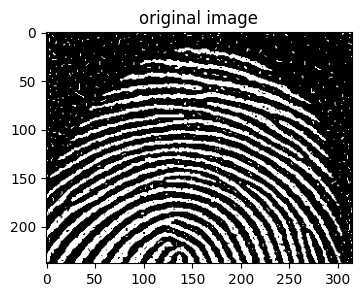

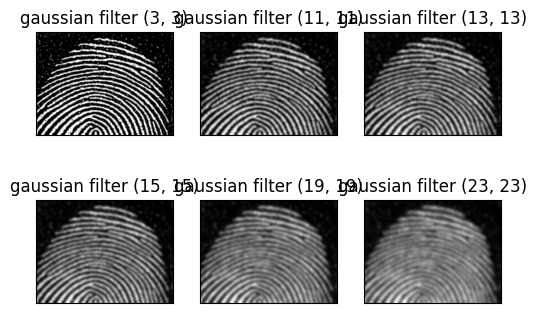

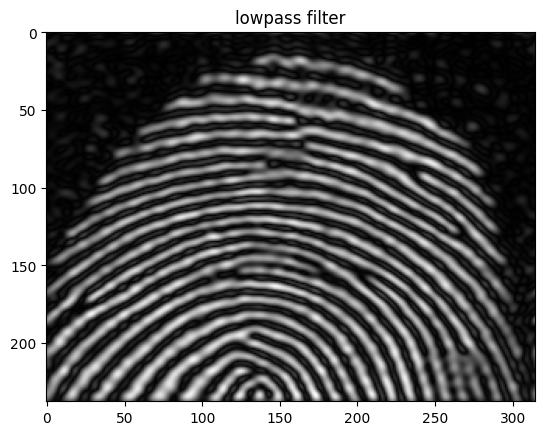

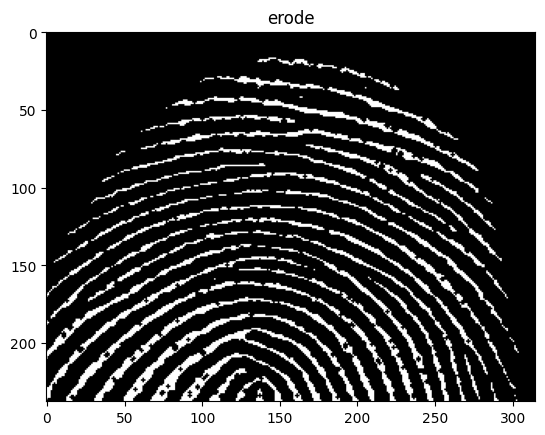

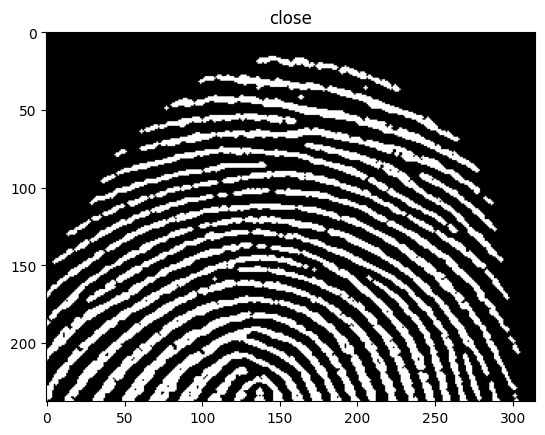

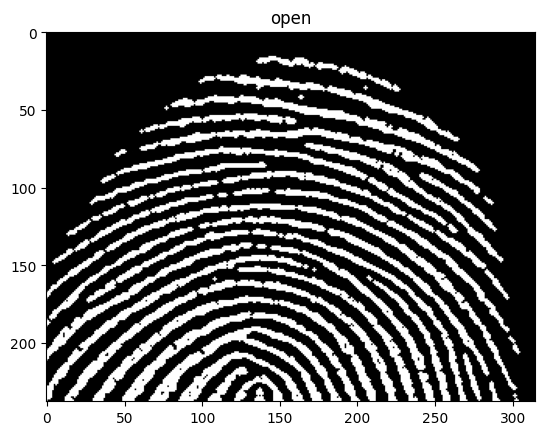

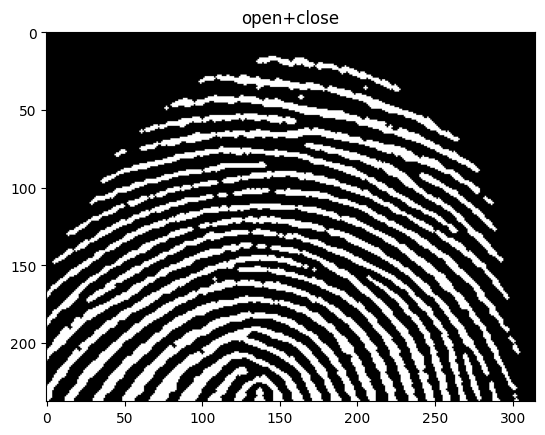

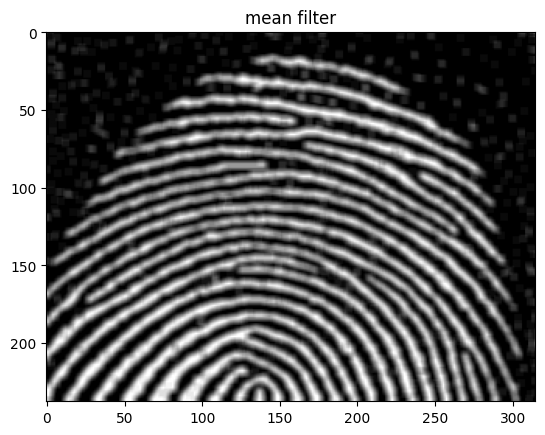

In [69]:
# @title smoothing blurring
# 왼쪽의 지문영상을 오른쪽 영상과 같이 개선해보세요.
# 수업시간에 배운 방법을 기본적으로 적용해보고,
# 더 좋은 방 법이 있으면 해당 방법도 적용하고 결과를 분석해보세요
img = cv2.imread('finger.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2_imshow(img)

# 원본 이미지
plt.figure(figsize=(4,3))
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.show()

# 잡음제거
#1. 가우시안
mask = [(3,3),(11,11),(13,13),(15,15),(19,19),(23,23)]
label = [f'{i}' for i in mask]

fig, ax = plt.subplots(2,3,figsize=(6,4))

for i in range(len(mask)):
  gaus = cv2.GaussianBlur(img, mask[i], 0.0)
  plt.subplot(2,3,i+1)
  plt.imshow(gaus, cmap='gray')
  plt.xticks([]), plt.yticks([])
  plt.title(f'gaussian filter {label[i]}')
plt.show()


#2. log ------> 가우시안 사용
# # LOG(y,x) = d''(G(y,x).conv2D(f(y,x))) = (d''G(y,x)).conv2D(f(y,x))
# # f(y,x): img

# # L = lambda ...
# # LOG = cv2.la

# mask4 = np.array([[0, -1, 0],
#                   [-1, 4, -1],
#                   [0, -1, 0]])

# mask8 = np.array([[-1,-1,-1],
#                   [-1,8,-1],
#                   [-1,-1,-1]])
# #cv2.GaussianBlur(img, mask[i], 0.0)
# LOG = cv2.filter2D(img, -1, cv2.Laplacian(cv2.getGaussianKernel(50, 1.0), cv2.CV_64F))
# plt.imshow(LOG, cmap='gray')


#3. lowpass
# 블로그, 지피티 참조
# 푸리에변환 -> 마스크만큼 시프트 -> 역변환

#gpt답변 : 2차원 이미지 변환, dft보다 빨라서 2가 붙고 다 fft 씀
freq = np.fft.fft2(img)
freq_shift = np.fft.fftshift(freq)

#마스크생성
d = 30
rows, cols = img.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows,cols),np.uint8)
mask[crow-d:crow+d, ccol-d:ccol+d] = 1

#필터적용
shift = freq_shift * mask

#역변환; shift->transform
ishift = np.fft.ifftshift(shift)
ifreq = np.fft.ifft2(ishift)
low_filter = np.abs(ifreq)  # 복소수를 실수로 변환

plt.imshow(low_filter, cmap='gray')
plt.title('lowpass filter')
plt.show()

#4. 1차 미분 연산자 -> 엣지 검출 (가우시안쓰는거니까)
# grad = ...

#5. 형태학적 스무딩
# 침식
se = np.uint8([[0,0,1,1,0,0],
             [0,1,1,1,1,0],
             [1,1,1,1,1,1],
             [0,1,1,1,1,0],
             [0,0,1,1,0,0]])
se = cv2.resize(se,dsize=(3,3))
erode = cv2.erode(img, se, iterations=1)
plt.imshow(erode, cmap='gray')
plt.title('erode')
plt.show()
#오프닝 혹은 클로징으로
se = cv2.resize(se, dsize=(3,3))
open = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)
plt.imshow(open, cmap='gray')
plt.title('close')
plt.show()
plt.imshow(open, cmap='gray')
plt.title('open')
plt.show()
#오프닝+클로징
open_close = cv2.morphologyEx(open, cv2.MORPH_CLOSE, se)
plt.imshow(open_close, cmap='gray')
plt.title('open+close')
plt.show()
#6. dog -> 로그와 동일
# DOG = ...

#7. 평균필터
mean = cv2.blur(img, (5,5))

plt.imshow(mean, cmap='gray')
plt.title('mean filter')
plt.show()

[-3.   -1.75 -0.5   0.75  2.  ]
[[-3.   -1.75 -0.5   0.75  2.  ]
 [-3.   -1.75 -0.5   0.75  2.  ]
 [-3.   -1.75 -0.5   0.75  2.  ]
 [-3.   -1.75 -0.5   0.75  2.  ]
 [-3.   -1.75 -0.5   0.75  2.  ]]
mesh (array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]]), array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]]))
()



ValueError: Argument Z must be 2-dimensional.

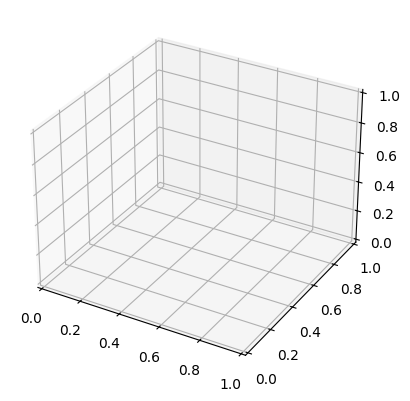

In [ ]:
#@title 테스트
# print(img.shape) #(238, 315)
# plt.imshow(gaus, cmap='gray')
# print(f'{mask[0]}')
# print(G())
f = lambda size=5: np.linspace(-size//2, size//2, size)
print(f())
ff = lambda size=5: np.meshgrid(f(size), f(size))
print(ff()[0])
meshgrid = np.meshgrid([1,2,3],[1,2,3])
print('mesh', meshgrid)

kernel = lambda ksize=5, sig=1.0: 1/(2*np.pi*(sig**2)) * np.exp(-(ksize**2+ksize**2)/2*(sig**2)) #ff()[0]
print(kernel().shape)

G = lambda size=5, sigma=1.0: kernel(size, sigma)/np.sum(kernel(size, sigma))
#print('G:', G()[0])

ax = np.linspace(-2, 2, 0)

print()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(meshgrid[0], meshgrid[1], kernel(ksize=len(meshgrid[0])))
plt.show()
kernel = lambda size=5, sig=1.0: 1/(2*np.pi*(sig**2)) * np.exp(-(size**2+size**2)/2*(sig**2))

def gaussian(size=5, sigma=1.0):
  # filter
  filter = np.zeros(((size//2)+1, (size//2)+1))
  print(size//2, size//2+1)
  print('f', filter)
  for i in range(size):
    for j in range(size):
      filter[i][j] = kernel(size)
      print('filter:', filter[i][j])
      ...
  return filter / np.sum(filter)

print(gaussian())

In [ ]:
# @title 결과 분석
# 가우시안 필터를 사용할 경우, 지문 근처의 점들이 조금 없어져보이긴 하지만,
# 필터 크기를 조금씩 늘려서 사용함에도 화질이 저하되는 것에 비해 노이즈가 효과적으로 제거되어 보이진 않음
# 그래도 3x3보단 23x23이 화질이 확 떨어졌음에도 확실히 노이즈가 적음

# opencv 스터디 문서 블로그의 예제 코드와 지피티의 예제 코드를 적절히 합했는데 생각보다 원하는 결과가 나오지 않음
# 가우시안 필터를 사용한 것과 유사해 보이며 d사이즈를 30이 제일 낫다고 생각함
# 숫자를 더 줄이거나 늘리면 이미지의 형태가 뭉개지거나 화질이 저하됨

# 침식 결과 생각보다 깨끗하게 나왔지만 지문도 같이 침식되어버림

# 닫힘과 열림, 합한 연산은 제일 만족스러운 결과를 보였음
# 닫힘+열림에 비해 닫힘과 열림의 결과를 보면 지문의 선 안에 구멍같은 노이즈가 보임

# 평균값을 가지고 연산하는 mean 필터를 적용해보니 가우시안이나 다른 필터와 비슷한 결과가 나옴

**#2-6**
===
다음 영상에서 원하는 선분을 없애 보시고,
어떻게 했는지 분석하세요.

In [70]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif'

--2025-04-13 08:28:30--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30092 (29K) [image/tiff]
Saving to: ‘Fig0905(a)(wirebond-mask).tif.1’

Fig0905(a)(wirebond 100%[===================>]  29.39K  --.-KB/s    in 0.004s  

2025-04-13 08:28:30 (6.79 MB/s) - ‘Fig0905(a)(wirebond-mask).tif.1’ saved [30092/30092]



In [71]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

(np.float64(-0.5), np.float64(485.5), np.float64(485.5), np.float64(-0.5))

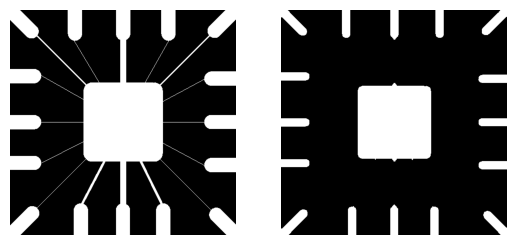

In [27]:
# @title 선분없애기
# 다음영상에서원하는선분을없애보시고,
# 어떻게했는지분석하세요.

se = np.uint8([[0,0,1,0,0],
               [0,1,1,1,0],
               [1,1,1,1,1],
               [0,1,1,1,0],
               [0,0,1,0,0]])

img = cv2.imread('Fig0905(a)(wirebond-mask).tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(1,2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

se=cv2.resize(se, dsize=(14,14))

img = cv2.erode(img, se, iterations=1)

plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')

plt.axis('off')

In [ ]:
# @title 결과 분석
# 사각형 분처의 얇은 선분을 제거하기 위해 침식 연산을 사용함
# circle 메소드 대신 원에 가깝도록 5x5 크기의 마름모 모양을 사각형 주변의 얇은 선분을 전부 지우기 위해 14x14크기로 늘려 사용함
# 사각형의 위아래에 튀어나온 부분이 남아있으며, 가장자리의 굵은 선분들도 얇아졌음

**#2-7**
===
아래의 Edge 검출 알고리즘 사용하여 edge를 검출하고, 각각 결과가
어떻게 다른 지 비교하세요

In [72]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif'

--2025-04-13 08:32:48--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262750 (257K) [image/tiff]
Saving to: ‘Fig0939(a)(headCT-Vandy).tif.1’

Fig0939(a)(headCT-V 100%[===================>] 256.59K  --.-KB/s    in 0.05s   

2025-04-13 08:32:49 (4.80 MB/s) - ‘Fig0939(a)(headCT-Vandy).tif.1’ saved [262750/262750]



In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

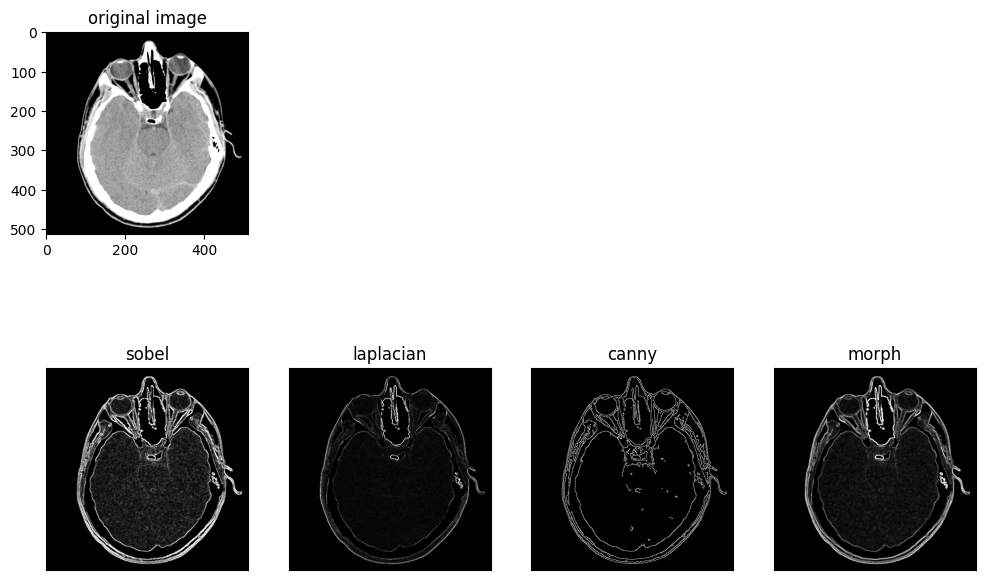

In [73]:
# @title 에지검출
# 아래의Edge 검출알고리즘사용하여edge를검출하고, 각각결과가
# 어떻게다른지비교하세요.
#  Sobel
#  Laplacian
#  Canny
#  Morphological Gradient

img = cv2.imread('Fig0939(a)(headCT-Vandy).tif')

plt.figure(figsize=(12,8))
plt.subplot(2,4, 1)
plt.imshow(img, 'gray')
plt.title('original image')

kernel_size = 3
mask_size = 3

#sobel
grad_x = cv2.Sobel(img, cv2.CV_32F, 1, 0, kernel_size)
grad_y = cv2.Sobel(img, cv2.CV_32F, 0, 1, kernel_size)

sobel_x=cv2.convertScaleAbs(grad_x)#절대값을 취해 양수 영상으로 변환
sobel_y=cv2.convertScaleAbs(grad_y)

edge_strenth=cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0) #에지 강도 계산

sobel = edge_strenth

#Laplacian
laplacian = cv2.Laplacian(img, cv2.CV_32F, kernel_size)
laplacian = cv2.convertScaleAbs(laplacian)

# canny
t1, t2 = 100, 200 # treshold
canny = cv2.Canny(img, t1, t2)

#morph
mask = np.uint8(np.ones((3,3)))
morph = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, mask)


filters = [sobel, laplacian, canny, morph]
filter_name = ['sobel', 'laplacian', 'canny', 'morph']

for i in range(4):
  plt.subplot(2,4,i+5)
  plt.imshow(filters[i], cmap='gray')
  plt.title(filter_name[i])
  plt.xticks([]), plt.yticks([])


In [ ]:
# @title 결과 분석
# sobel 알고리즘을 사용하니 뇌의 형태가 제일 많이 노이즈처럼 남아있음

# laplacian 알고리즘은 안구나 다른 부분은 거의 지워졌고 코 쪽 부분은 잘 남아있으며, 나머지 알고리즘 결과에 비해 대부분 사라짐

# canny 알고리즘은 소벨과 라플라시안에 비해 외곽선 자체가 뚜렷하지만, 뇌가 있는 부분에서 노이즈가 강조되었음

# morphological gradient 알고리즘은 위의 세가지 특징을 조금씩 합친 것처럼 보임


**#2-8**
===
아래의 알고리즘을 사용하여 노이즈라 생각되는 영역을
지우고, 각각 결과가 어떻게 다른 지 비교 분석하세요.

In [ ]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif'

--2025-04-12 16:00:43--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321002 (313K) [image/tiff]
Saving to: ‘Fig0938(a)(cygnusloop_Xray_original).tif’

Fig0938(a)(cygnuslo 100%[===================>] 313.48K  --.-KB/s    in 0.03s   

2025-04-12 16:00:43 (9.70 MB/s) - ‘Fig0938(a)(cygnusloop_Xray_original).tif’ saved [321002/321002]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Text(0.5, 1.0, 'smoothing\nfilter')

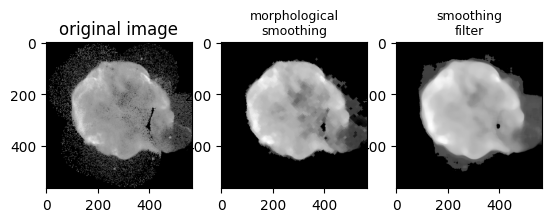

In [ ]:
# @title 노이즈 제거
# 아래의알고리즘을사용하여노이즈라생각되는영역을
# 지우고, 각각결과가어떻게다른지비교분석하세요.
#  Morphological Smoothing
#   Smoothing Filter

img = cv2.imread('Fig0938(a)(cygnusloop_Xray_original).tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# fig, ax = plt.subplots(1,3,figsize=(9,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.axis('off')

# morphological smoothing
# 열림->닫힘
filter = [[0,1,0],
               [1,1,1],
               [0,1,0]]

se = np.uint8(filter)
se = cv2.resize(se, dsize=(11,11))

img_morph = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, se)

# img_morph = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, se)
# img_morph = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, se)

plt.subplot(1,3,2)
plt.imshow(img_morph, cmap='gray')
plt.title('morphological\nsmoothing', fontsize='9')
plt.axis('off')

#smoothing filter
 ## 중간값 필터
img_filter = cv2.medianBlur(img,23) #소금후추에 강하다고 해서 사용

# img_filter = cv2.GaussianBlur(img, (51,51), 0.0); 탈락(성능 너무 별로)
# img_filter = cv2.medianBlur(img, 21) # median이랑 거의 비슷

plt.subplot(1,3,3)
plt.imshow(img_filter, cmap='gray')
plt.title('smoothing\nfilter', fontsize=9)
plt.axis('off')


In [ ]:
# @title 결과 분석
# 원본 영상에 나와있는 중앙 원 형태의 물체를 고정하고, 그 주변의 점들을 없애려고 함
# 노이즈를 제거하기위해 형태학적 스무딩 방법과 소금후추에 강하다고 하는 중간값 필터를 사용함

# 둘 다 노이즈 제거엔 효과적이었음
# 그러니 형태학적으로 제거한 영상이 원본 영상을 더 잘 표현하였고,필터를 사용한 결과 영상의 경우 중앙에 있는 원형 물체 또한 뭉개짐

In [ ]:
#@title 테스트
print(img.shape)
print(se.shape)

# filter = filter*3

print(se)

(566, 566)
(11, 11)
[[0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]]


**#2-9**
===
다음 영상을 이진화하되, 수업시간에 배운 2가지 방법을 모두 써보고, 각각의 결과에 대해 비교 분석하세요.


In [ ]:
!wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `wget https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

([], [])

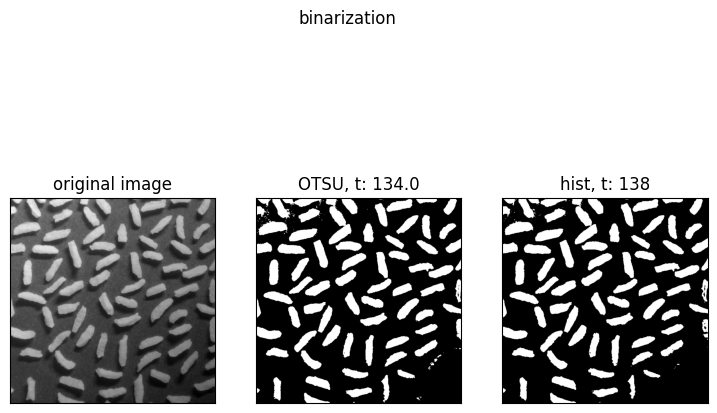

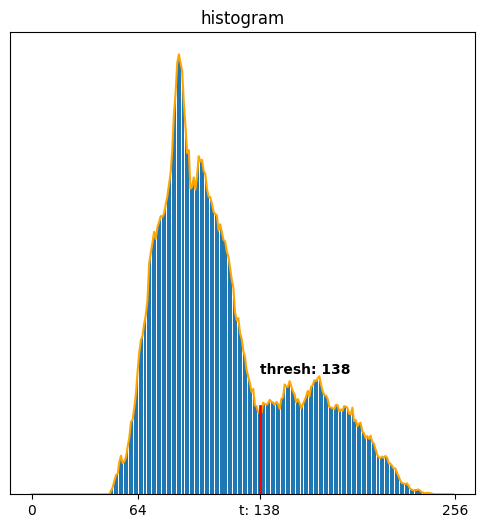

In [ ]:
# @title 이진화
# 다음 영상을 이진화하되, 수업시간에 배운 2가지 방법을 모두 써보고,
# 각각의 결과에 대해 비교 분석하세요.

img = cv2.imread('Fig0940(a)(rice_image_with_intensity_gradient).tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fig, ax = plt.subplots(1, 3, figsize=(9, 6))

plt.suptitle('binarization')
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

#1. otsu
t, b_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.subplot(1,3,2)
plt.imshow(b_img, cmap='gray')
plt.title(f'OTSU, t: {t}')
plt.xticks([]), plt.yticks([])

#2. 히스토그램

# 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
# 찾은 임계값
thresh = 138


# 이미지 출력; 138 기준
mask = img < thresh

##img = 0 if img[mask] else 255   # 배열이라 안됨
#binarize = lambda scale: 0 if scale < 138 else 255 #truefalse 안됨
# img[mask] = img[mask]
# img[~mask] = img[~mask]
#img[mask] = binarize(img[mask])
img = np.where(mask, 0, 255)

plt.subplot(1,3,3)
plt.imshow(img, cmap='gray')
plt.title(f'hist, t: {thresh}')
plt.xticks([]), plt.yticks([])


## 히스토그램 표현 후 적당히 계곡 찾기

plt.figure(figsize=(6,6))
#plt.figure(figsize=(10,10))
plt.title('histogram')
plt.plot(hist, 'orange')
plt.bar(range(256), hist.ravel() ) # shape 맞춰줘야함

plt.axvline(thresh, ymax=hist[thresh][0]/hist.max(),  color='r', linewidth=2)  ## ymax가 비율이라 정규화해야한다고함
plt.text(thresh, hist[thresh][0]+500,f'thresh: {thresh}', fontweight='bold')

plt.xticks([0, 64, thresh ,256], labels=['0', '64', f't: {thresh}', 256])  # 137~138값인데 적당히 138로 타협
plt.yticks([ ], labels=[ ])

##
## 137~138 사이의 실수값을 조정해가며 ~~

In [ ]:
# @title 결과 분석

# 오츄 알고리즘을 사용하는 방법과 히스토그램의 계곡을 임계값으로 사용하는 방법을 적용함

# 두 알고리즘 모두 우측 하단 부분은 조금의 노이즈만을 남긴 채 검게 칠해졌음

# 오츄의 경우 좌측 상단에 노이즈가 생겼으며, 히스토그램은 쌀알 안에 구멍이 생기거나 커짐


In [ ]:
#@title 테스트
# print(hist.shape, hist_norm.shape, range(256))
# print(hist[138][0])
print(img.shape)

(266789,)


**#2-10**
===
다음 영상을 Morphology를 적용하여 오른쪽과
같이 분할하세요

In [ ]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif'

--2025-04-07 09:14:03--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360678 (352K) [image/tiff]
Saving to: ‘Fig0943(a)(dark_blobs_on_light_background).tif’

Fig0943(a)(dark_blo 100%[===================>] 352.22K  --.-KB/s    in 0.008s  

2025-04-07 09:14:03 (42.6 MB/s) - ‘Fig0943(a)(dark_blobs_on_light_background).tif’ saved [360678/360678]



In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [ ]:
origin = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif')

origin = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
origin = cv2.resize(origin, dsize=(600,600))

In [ ]:
#@ titel 기본 morph 연산

###### se; 이정도수준으로는 안지워짐
#9x9
se9 = np.uint8([[0,0,0,1,1,1,0,0,0],
               [0,0,1,1,1,1,1,0,0],
               [0,1,1,1,1,1,1,1,0],
               [1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1],
               [0,1,1,1,1,1,1,1,0],
               [0,0,1,1,1,1,1,0,0],
               [0,0,0,1,1,1,0,0,0]])
#6x6
se6=np.uint8([[0,0,1,1,0,0],
             [0,1,1,1,1,0],
             [1,1,1,1,1,1],
             [0,1,1,1,1,0],
             [0,0,1,1,0,0]])
#3x3
se3=np.uint8([[0,1,0],
             [1,1,1],
             [0,1,0]])

fig, ax = plt.subplots(4,3, figsize=(6,6))

# plt.subplot(1,3,1)
# plt.subplot(3,1,1)


### morphs

# dilation
#plt.subplot(1,3,1)
plt.title('dilation')
img_b1 = cv2.dilate(origin, se9, iterations=1)
img_b2 = cv2.dilate(origin, se6, iterations=1)
img_b3 = cv2.dilate(origin, se3, iterations=1)
img = [img_b1, img_b2, img_b3]

for i in range(3):
  ax[0, i].imshow(img[i], cmap='gray')
  ax[0, i].set_title(f'dilate se:{3*(i+1)}x{3*(i+1)}')


  # plt.subplot(1,3,i+1)
  # plt.imshow(img[i], cmap='gray')
  # plt.xticks([]), plt.yticks([])

# plt.subplot(1,3,1)
# plt.imshow(img_b1, cmap='gray')
# plt.xticks([]), plt.yticks([])

# plt.subplot(1,3,2)
# plt.imshow(img_b2, cmap='gray')
# plt.xticks([]), plt.yticks([])

# plt.subplot(1,3,3)
# plt.imshow(img_b3, cmap='gray')
# plt.xticks([]), plt.yticks([])

#plt.title('dilation')
#plt.show()

# erosion
#plt.subplots(figsize=(3,3))
# plt.subplot(1,3,2)
# plt.subplot(3,1,2)
plt.title('erosion')
img_b1 = cv2.erode(origin, se9, iterations=1)
img_b2 = cv2.erode(origin, se6, iterations=1)
img_b3 = cv2.erode(origin, se3, iterations=1)
img = [img_b1, img_b2, img_b3]
# for i in range(3):
  # plt.subplot(2,3,i+1)
  # plt.imshow(img[i], cmap='gray')
  # plt.xticks([]), plt.yticks([])
for i in range(3):
  ax[1, i].imshow(img[i], cmap='gray')
  ax[1, i].set_title(f'erode se:{3*(i+1)}x{3*(i+1)}')

# plt.subplot(1,3,1)
# plt.imshow(img_b1, cmap='gray')
# plt.xticks([]), plt.yticks([])

# plt.subplot(1,3,2)
# plt.imshow(img_b2, cmap='gray')
# plt.xticks([]), plt.yticks([])

# plt.subplot(1,3,3)
# plt.imshow(img_b3, cmap='gray')
# plt.xticks([]), plt.yticks([])

#plt.show()

# dil -> ero
# plt.subplots(figsize=(3,3))
# plt.subplot(3,1,3)
# plt.subplot(3,1,3)
plt.title('dilation -> erosion')
img_b1 = cv2.erode(cv2.dilate(origin, se9, iterations=1), se9, iterations=1)
img_b2 = cv2.erode(cv2.dilate(origin, se6, iterations=1), se6, iterations=1)
img_b3 = cv2.erode(cv2.dilate(origin, se3, iterations=1), se3, iterations=1)
img=[img_b1, img_b2, img_b3]

for i in range(3):
  ax[2, i].imshow(img[i], cmap='gray')
  ax[2, i].set_title(f'dil->ero se:{3*(i+1)}x{3*(i+1)}')

# for i in range(3):
#   plt.subplot(3,3,i+1)
#   plt.imshow(img[i], cmap='gray')
#   plt.xticks([]), plt.yticks([])


# plt.subplot(1,3,1)
# plt.imshow(img_b1, cmap='gray')
# plt.xticks([]), plt.yticks([])

# plt.subplot(1,3,2)
# plt.imshow(img_b2, cmap='gray')
# plt.xticks([]), plt.yticks([])

# plt.subplot(1,3,3)
# plt.imshow(img_b3, cmap='gray')
# plt.xticks([]), plt.yticks([])


# ero -> dil
plt.title('erosion -> dilation')
img_b1 = cv2.dilate(cv2.erode(origin, se9, iterations=1), se9, iterations=1)
img_b2 = cv2.dilate(cv2.erode(origin, se6, iterations=1), se6, iterations=1)
img_b3 = cv2.dilate(cv2.erode(origin, se3, iterations=1), se3, iterations=1)
img=[img_b1, img_b2, img_b3]

for i in range(3):
  ax[3, i].imshow(img[i], cmap='gray')
  ax[3, i].set_title(f'ero->dil se:{3*(i+1)}x{3*(i+1)}')



for axis in ax.flat:
  axis.axis('off')

plt.tight_layout()
plt.show()



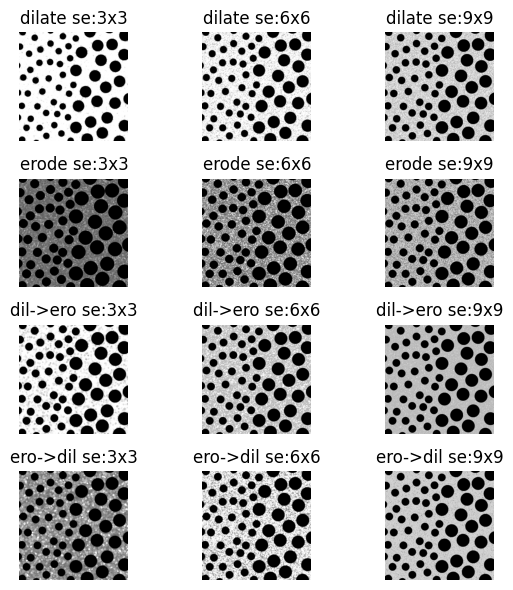

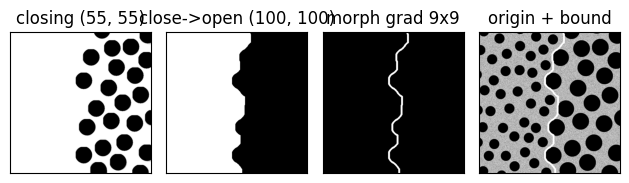

In [ ]:
#@title morphological segmentation
 #600x600
#cv2_imshow(origin)

###############################################################

## closing -> opening -> white top hat ->

# se
size=(55,55)
center=(size[0]//2+1, size[1]//2+1)
radius=size[0]//2+1
se=np.zeros(size, np.uint8)
se = cv2.circle(se, center, radius, (1,1,1),-1)
# plt.imshow(se, label='circle se')

# closing
img_close = cv2.morphologyEx(origin,cv2.MORPH_CLOSE, se)
plt.subplot(2,4,1)
plt.imshow(img_close, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title('closing {}'.format(size))


# se
## 9x9 팽창
size=(100,100) # 해보니까 여기서 작아지면 구멍 생김
#center=(size[0]//2+1, size[1]//2+1)
#radius=size[0]//2+1
#se=np.zeros(size, np.uint8)
#se = cv2.poly(se, center, radius, (1,1,1),-1)
se = cv2.resize(se9, dsize=size)



# otsu ; 깨지는 부분이 일부 있음, 뭔가 달라는 졌는데
t, bin_img = cv2.threshold(img_close, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#opening
img_open = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, se)
#img_opening = cv2.morphologyEx(img_opening, cv2.THRESH_OTSU, se)

plt.subplot(2,4,2)
plt.imshow(img_open, cmap='gray')
plt.xticks([]), plt.yticks([]), plt.title(f'close->open {size}')

# 외곽선 추출; 내부 경계
# 작은 se로 기울기 계산
img_grad = cv2.morphologyEx(img_open, cv2.MORPH_GRADIENT,se9)

plt.subplot(2,4,3)
plt.imshow(img_grad, cmap='gray')
plt.xticks([]), plt.yticks([]), plt.title(f'morph grad 9x9')


# bound + origin
#result = cv2.morphologyEx(origin, cv2.MORPH_E, img_grad) #origin + img_grad
result = cv2.add(origin, img_grad) #그냥더하니까안더해짐
plt.subplot(2,4,4)
plt.imshow(result, cmap='gray')
plt.xticks([]), plt.yticks([]),plt.title(f'origin + bound')

plt.tight_layout()
plt.show()

# 마스크를 팽창시켜서 사용
# se=np.



# plt.subplots(figsize=(10,10))
# plt.subplot(2,2,1)
# plt.imshow(img, cmap='gray')
# plt.subplot(2,2,2)
# plt.imshow(img_b, cmap='gray')

In [ ]:
# @title
# 닫힘 -> 열림 -> 기울기 -> 결합
# 그냥 따로따로 침식과 팽창 연산을 한 결과를 보면 cv의 메소드보다 정확하지 않음
# 형태소도 생각보다 큰 사이즈를 사용하지 않으면 제거가 제대로 안되거나
# 연산하는 방법에 따라 원하는 결과를 정상적으로 표현되거나 표현되지 않은 경우가 생김